In [ ]:
import numpy as np
import os
import pandas as pd
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
m

*italicised text*# New section

In [ ]:
!ls


drive  sample_data


In [ ]:
img=[]
for i in range(9):
    
    path="/content/drive/My Drive/ClothingAttributeDataset/ClothingAttributeDataset/images/00000"+str(i+1)+".jpg"
    
    img.append(tf.keras.preprocessing.image.load_img(path))
    
for i in range(9,99):
    
    
    path="/content/drive/My Drive/ClothingAttributeDataset/ClothingAttributeDataset/images/0000"+str(i+1)+".jpg"
    
    img.append(tf.keras.preprocessing.image.load_img(path))
for i in range(99,999):
    
    path="/content/drive/My Drive/ClothingAttributeDataset/ClothingAttributeDataset/images/000"+str(i+1)+".jpg"
    
    img.append(tf.keras.preprocessing.image.load_img(path))
for i in range(999,1856):
    
    path="/content/drive/My Drive/ClothingAttributeDataset/ClothingAttributeDataset/images/00"+str(i+1)+".jpg"
    
    img.append(tf.keras.preprocessing.image.load_img(path))
    

In [ ]:
list0=[]
list1=[]
for i in range (1856):
    img1=np.asarray(img[i])
    list0.append(img1.shape[0])
    list1.append(img1.shape[1])
    
max(list0), min(list0), max(list1), min(list1)    

(1296, 299, 864, 240)

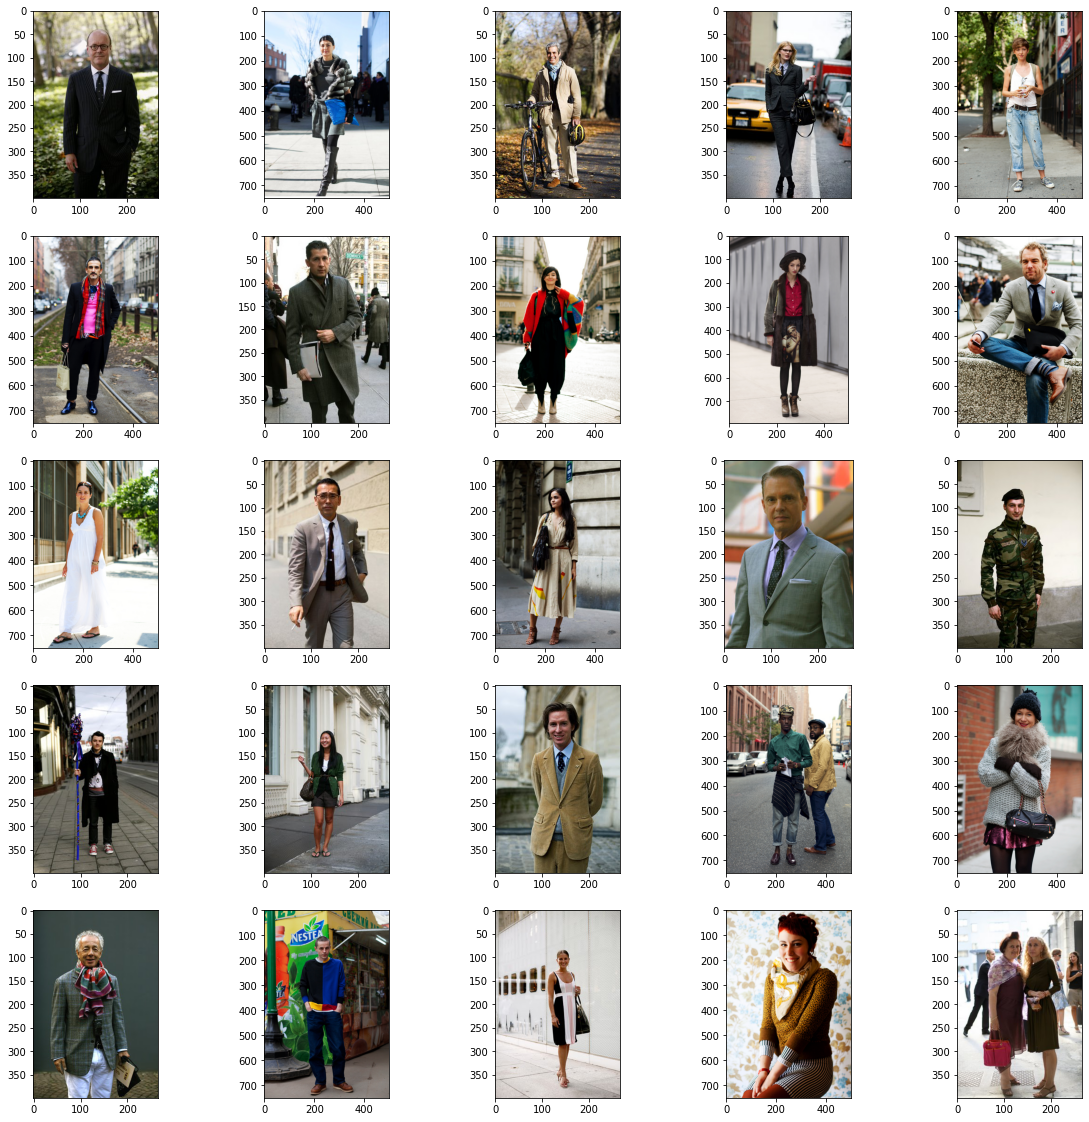

In [ ]:
plt.figure(figsize=(20,20))
for i in range (5):
    for j in range (5):
        plt.subplot(5,5,i*5+j+1)
        plt.imshow(img[i*5+j])

In [ ]:
max0= min(list0)
max1= min(list1)
data=np.zeros((1856,1,299,240,3),dtype=np.int)
for i in range (1856):
    img1=np.asarray(img[i])
    a,b,c=img1.shape
    
    img1=img1.reshape((1,a,b,c))
    x,y=img1.shape[1],img1.shape[2]
    
    imgt=tf.keras.layers.Cropping2D(
        cropping=(((x-max0)//2,(x-max0)//2), ((y-max1)//2,(y-max1)//2 ))
    )(img1)
    imgt=np.asarray(imgt)
    if(imgt.shape[1]==300):
         imgt=tf.keras.layers.Cropping2D(
         cropping=((1,0), (0,0))
         )(imgt)
    if(imgt.shape[2]==241):
        imgt=tf.keras.layers.Cropping2D(
        cropping=((0,0), (1,0))
        )(imgt)
        
    data[i,:,:,:,:]=imgt

In [ ]:

data=data.reshape((1856,299,240,3))
data.shape

(1856, 299, 240, 3)

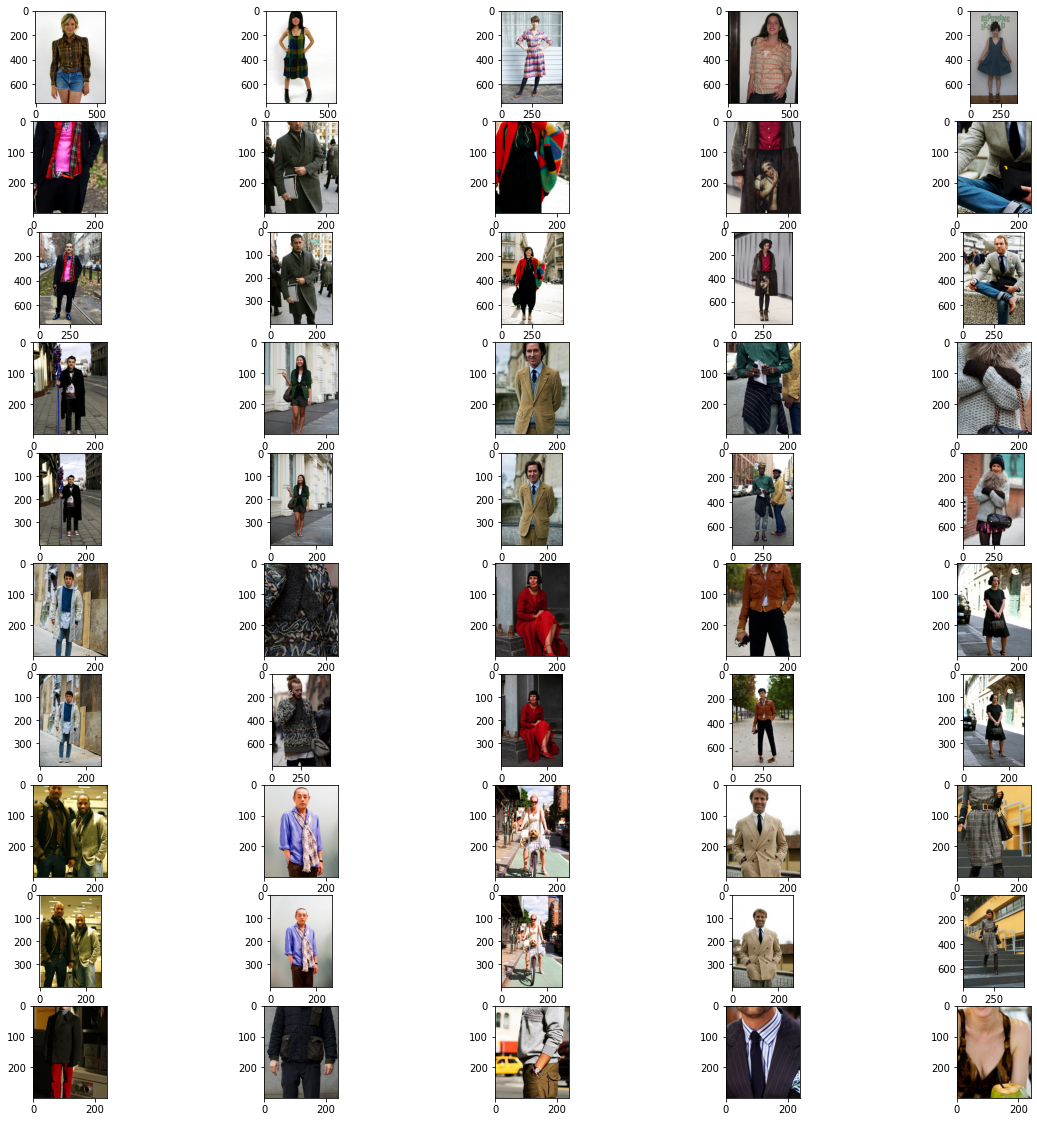

In [ ]:
plt.figure(figsize=(20,20))
for i in range (10):
    if i%2==1:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(data[i*5+j],cmap='gray')
    else:
        for j in range (5):
            plt.subplot(10,5,i*5+j+1)
            plt.imshow(img[(i-1)*5+j],cmap='gray')
        

In [ ]:
data.shape

(1856, 299, 240, 3)

In [ ]:
import scipy.io
import os 

In [ ]:
data_y=[]
data_y_col_name=[]
directory="/content/drive/My Drive/ClothingAttributeDataset/ClothingAttributeDataset/labels"
for filename in os.listdir(directory):
    data_y_col_name.append(filename)
    path=os.path.join(directory, filename)
    data_y_temp=(scipy.io.loadmat(path))
    data_y.append(np.asarray(data_y_temp['GT']))

In [ ]:
data_y=np.asarray(data_y)

In [ ]:
data_y=np.asarray(data_y)
data_y=data_y.T
data_y=data_y.reshape((1856,26))
data_y.shape

(1856, 26)

In [ ]:
data_y_pd=pd.DataFrame(data_y,columns=data_y_col_name)

In [ ]:
data_y_pd.drop(['black_GT.mat','blue_GT.mat','brown_GT.mat','cyan_GT.mat','gray_GT.mat','green_GT.mat','many_colors_GT.mat','purple_GT.mat','red_GT.mat','white_GT.mat','yellow_GT.mat'],axis=1, inplace=True)

In [ ]:
data_y_pd.head()

,collar_GT.mat,gender_GT.mat,category_GT.mat,neckline_GT.mat,pattern_plaid_GT.mat,placket_GT.mat,necktie_GT.mat,pattern_stripe_GT.mat,pattern_spot_GT.mat,pattern_graphics_GT.mat,pattern_floral_GT.mat,pattern_solid_GT.mat,skin_exposure_GT.mat,sleevelength_GT.mat,scarf_GT.mat
0,2.0,1.0,5.0,1.0,1.0,2.0,2.0,NaN,NaN,1.0,1.0,NaN,1.0,3.0,1.0
1,NaN,2.0,NaN,2.0,1.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,3.0,1.0
2,2.0,1.0,4.0,NaN,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0
3,2.0,2.0,5.0,NaN,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0
4,1.0,2.0,6.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0


In [ ]:
for col_name in data_y_pd.columns: 
    if col_name=='slevelength_GT.mat':
        data_y_pd[col_name].fillna(data_y_pd[col_name].mode(),inplace=True)
    elif col_name=='category_GT.mat':
        data_y_pd[col_name].fillna(8,inplace=True)
    elif col_name=='neckline_GT.mat':
        data_y_pd[col_name].fillna(4,inplace=True)
    else:
        data_y_pd[col_name].fillna(1,inplace=True)

In [ ]:
data_y=np.asarray(data_y_pd)
data_y=data_y-1

In [ ]:
data_y_pd=pd.DataFrame(data_y)

In [ ]:
data_y_pd=pd.get_dummies(data_y_pd,columns=[2,3,13])

In [ ]:
data_y=np.asarray(data_y_pd)

In [ ]:
data_y.shape

(1856, 27)

In [ ]:
pre_trained=tf.keras.applications.DenseNet201(include_top=False, input_shape=(299,240 ,3),
                                                     pooling='avg', weights='imagenet')

model = tf.keras.models.Sequential([
        pre_trained,
        
        tf.keras.layers.Dense(128, activation='relu'),
       
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(27, activation='sigmoid')
    ])
 
model.layers[0].trainable = False
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['acc'])

74842112/74836368 [==============================] - 1s 0us/step


In [ ]:

data=data.reshape((-1,299,240,3))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,data_y,test_size=0.3)

In [ ]:
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5)

In [ ]:
print(x_train.shape, y_train.shape)

(1299, 299, 240, 3) (1299, 27)


In [ ]:
batch_size=64
steps_per_epoch=int(x_train.shape[0]/batch_size)
validation_steps=int(x_val.shape[0]/batch_size)

history=model.fit(x_train,y_train,
                    validation_data=(x_val,y_val),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=20
                    )

Epoch 1/20
20/20 [==============================] - 453s 23s/step - loss: 0.1937 - acc: 0.0762 - val_loss: 0.1393 - val_acc: 0.0432
Epoch 2/20
20/20 [==============================] - 444s 22s/step - loss: 0.1416 - acc: 0.1678 - val_loss: 0.1307 - val_acc: 0.2482
Epoch 3/20
20/20 [==============================] - 441s 22s/step - loss: 0.1321 - acc: 0.1855 - val_loss: 0.1250 - val_acc: 0.1547
Epoch 4/20
20/20 [==============================] - 449s 22s/step - loss: 0.1261 - acc: 0.1971 - val_loss: 0.1245 - val_acc: 0.2122
Epoch 5/20
20/20 [==============================] - 450s 22s/step - loss: 0.1223 - acc: 0.2009 - val_loss: 0.1234 - val_acc: 0.2518
Epoch 6/20
20/20 [==============================] - 450s 23s/step - loss: 0.1200 - acc: 0.1955 - val_loss: 0.1215 - val_acc: 0.1871
Epoch 7/20
20/20 [==============================] - 449s 22s/step - loss: 0.1179 - acc: 0.2025 - val_loss: 0.1231 - val_acc: 0.2410
Epoch 8/20
20/20 [==============================] - 447s 22s/step - loss: 0.

In [ ]:

plt.plot(history.history['accuracy'])


In [ ]:
dis.evaluate(x_test,y_test)

9/9 [==============================] - 8s 894ms/step - loss: 20.0185 - accuracy: 0.4086


[20.01852798461914, 0.40860214829444885]

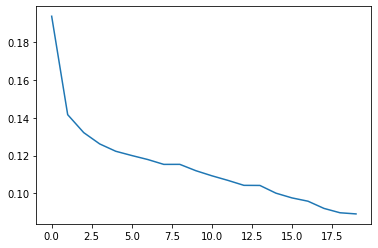

In [ ]:

plt.plot(history.history['loss'])

In [ ]:
pred=model.predict(x_test)

In [ ]:
np.asarray(pred[0])

array([0.901122  , 0.27434415, 0.0438672 , 0.9735518 , 0.2598819 ,
       0.01754025, 0.00302434, 0.00341532, 0.00610691, 0.8712801 ,
       0.01718688, 0.17274716, 0.03958496, 0.07104021, 0.00407368,
       0.12267566, 0.23244861, 0.01602307, 0.02067894, 0.50636876,
       0.4721315 , 0.03402191, 0.05098143, 0.4576984 , 0.00894484,
       0.00592941, 0.98181045], dtype=float32)

In [ ]:
y_test[0]

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

In [ ]:
model.save('/content/drive/My Drive/trend_score_2_20.h5')